In [7]:
!pip install scikit-learn

  Using cached scikit_learn-1.2.0-cp38-cp38-win_amd64.whl (8.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/hp/Documents/traffic sign recogination')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import Adam
# from tensorflow.keras.models import Model
from keras.models import Model
# from tensorflow.keras import Model
from keras.layers import Dense
from keras.models import Sequential, load_model
# from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [47]:
print(os.getcwd())
# model=Model


C:\Users\hp\Documents\traffic sign recogination


In [48]:
print("IMPORTING OF THE IMAGE")

IMPORTING OF THE IMAGE


In [49]:
count = 0
path = "Train"
data = [] 
label = []
classes =  43
cur_path = os.getcwd()

In [50]:
myList = os.listdir(path)
noOfClasses = len(myList)
print("importing classes ...")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
        curImg = cv2.resize(curImg, (32,32))
        curImg = np.array(curImg)
        data.append(curImg)
        label.append(count)
    print(count, end=" ")
    count +=1
data = np.array(data)
label = np.array(label)


importing classes ...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [52]:
print(data.shape, label.shape)

(39209, 32, 32, 3) (39209,)


In [53]:

np.save('./training/data', data)
np.save('./training/target', label)

In [54]:
data = np.load('./training/data.npy', allow_pickle=True)
label = np.load('./training/target.npy', allow_pickle=True)

In [55]:
print(data.shape, label.shape)

(39209, 32, 32, 3) (39209,)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size= 0.2, random_state= 0)

In [57]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [58]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [2]:
def myModel():
    no_of_filter = 60
    size_of_fliter=(5,5)
    
    size_of_fliter2=(3,3)
    size_of_pool = (2,2)
    no_of_Nodes = 256
    input_shape= (32,32,3)
    
    model = Sequential()
    model.add(Conv2D(no_of_filter, size_of_fliter, input_shape=input_shape, activation='relu'))
    model.add(Conv2D(no_of_filter, size_of_fliter2, activation='relu' ))
    model.add(MaxPool2D(pool_size = size_of_pool))
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(no_of_filter//2, size_of_fliter2, activation ='relu'))
    model.add(Conv2D(no_of_filter//2, size_of_fliter2, activation= 'relu'))
    model.add(MaxPool2D(pool_size=size_of_pool))
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    model.add(Dense(no_of_Nodes, activation= 'relu'))
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(noOfClasses, activation = 'softmax'))
    #comple model
    model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

    

    

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        4560      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 60)        32460     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 60)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 60)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 30)          8130      
                                                        

In [61]:
epochs = 7
model=myModel()
result_fit = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/7
981/981 [==============================] - 332s 330ms/step - loss: 3.4864 - accuracy: 0.1013 - val_loss: 1.9455 - val_accuracy: 0.4445
Epoch 2/7
981/981 [==============================] - 365s 372ms/step - loss: 1.4432 - accuracy: 0.5657 - val_loss: 0.5806 - val_accuracy: 0.8267
Epoch 3/7
981/981 [==============================] - 370s 377ms/step - loss: 0.7099 - accuracy: 0.7804 - val_loss: 0.3148 - val_accuracy: 0.9036
Epoch 4/7
981/981 [==============================] - 431s 439ms/step - loss: 0.4949 - accuracy: 0.8500 - val_loss: 0.1904 - val_accuracy: 0.9421
Epoch 5/7
981/981 [==============================] - 450s 459ms/step - loss: 0.3790 - accuracy: 0.8862 - val_loss: 0.1544 - val_accuracy: 0.9549
Epoch 6/7
981/981 [==============================] - 421s 429ms/step - loss: 0.3348 - accuracy: 0.8988 - val_loss: 0.1376 - val_accuracy: 0.9600
Epoch 7/7
981/981 [==============================] - 312s 318ms/step - loss: 0.2885 - accuracy: 0.9153 - val_loss: 0.1638 - val_ac

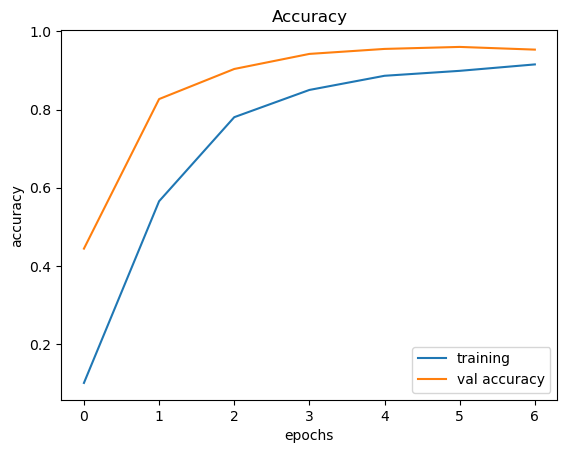

In [62]:
plt.figure(0)
plt.plot(result_fit.history['accuracy'], label= 'training')
plt.plot(result_fit.history['val_accuracy'],label=  'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

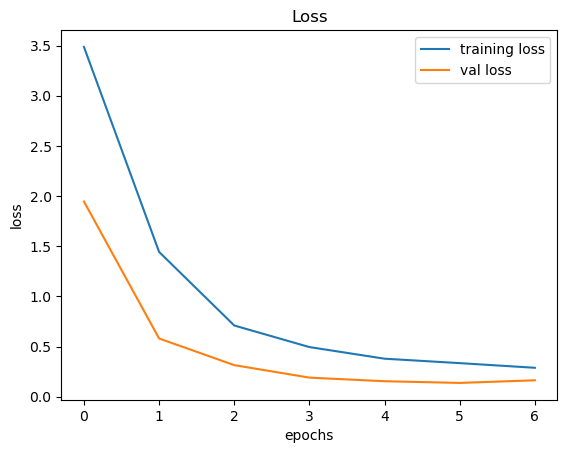

In [63]:
plt.figure(0)
plt.plot(result_fit.history['loss'], label= 'training loss')
plt.plot(result_fit.history['val_loss'],label=  'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
import pickle
pickle_out = open("model_traned.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()
# model.save('model_traned.pickle.tf')
cv2.waitKey(0)

INFO:tensorflow:Assets written to: ram://48e34d01-8462-41fa-bb81-346d1e835832/assets


INFO:tensorflow:Assets written to: ram://48e34d01-8462-41fa-bb81-346d1e835832/assets


INFO:tensorflow:Assets written to: model_traned.pickle.tf\assets


INFO:tensorflow:Assets written to: model_traned.pickle.tf\assets


-1

In [64]:
num_samples = []
for i in range(classes):
    file_count = len(os.listdir(path+"/"+str(i)))
    num_samples.append(file_count)
print(len(num_samples))  

43


In [65]:
print(num_samples)

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


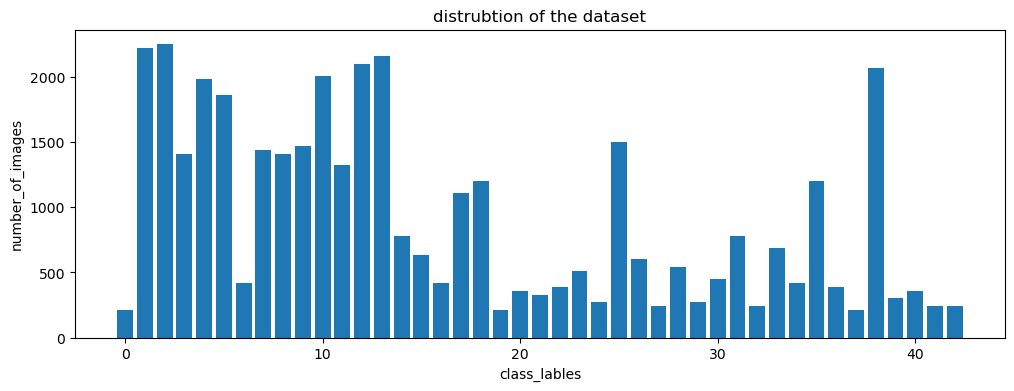

In [66]:
plt.figure(figsize = (12,4))
plt.bar(range(0, len(num_samples)),num_samples)
plt.title('distrubtion of the dataset')
plt.xlabel("class_lables")
plt.ylabel("number_of_images")
plt.show()

In [1]:
## save model
save_path = './model.h5'
model.save(save_path)

NameError: name 'model' is not defined

In [70]:
import pandas as pd
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label =  y_test['ClassId'].values
    imags = y_test['Path'].values
    data= []
    for img in imags: 
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (32,32))
        image = np.array(image)
        data.append(image)
    x_test = np.array(data)
    return x_test,label

In [69]:
x_test, label = testing('Test.csv')

In [71]:
# pred = model.predict_classes(X_test)
# pred
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

395/395 [==============================] - 36s 85ms/step


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.9089469517022961


In [73]:
model.save("./training/TSR.h5")

In [3]:
import os
os.chdir(r'C:/Users/hp/Documents/traffic sign recogination')
from keras.models import load_model
model = load_model("./training/TSR.h5")

In [4]:
classes = {
     0:'Speed Limit 20 km/h',
     1:'Speed Limit 30 km/h',
     2:'Speed Limit 50 km/h',
     3:'Speed Limit 60 km/h',
     4:'Speed Limit 70 km/h',
     5:'Speed Limit 80 km/h',
     6:'End of Speed Limit 80 km/h',
     7:'Speed Limit 100 km/h',
     8:'Speed Limit 120 km/h',
     9:'No passing',
     10:'No passing for vechiles over 3.5 metric tons',
     11:'Right-of-way at the next intersection',
     12:'Priority road',
     13:'Yield',
     14:'Stop',
     15:'No vechiles',
     16:'Vechiles over 3.5 metric tons prohibited',
     17:'No entry',
     18:'General caution',
     19:'Dangerous curve to the left',
     20:'Dangerous curve to the right',
     21:'Double curve',
     22:'Bumpy road',
     23:'Slippery road',
     24:'Road narrows on the right',
     25:'Road work',
     26:'Traffic signals',
     27:'Pedestrians',
     28:'Children crossing',
     29:'Bicycles crossing',
     30:'Beware of ice/snow',
     31:'Wild animals crossing',
     32:'End of all speed and passing limits',
     33:'Turn right ahead',
     34:'Turn left ahead',
     35:'Ahead only',
     36:'Go straight or right',
     37:'Go straight or left',
     38:'Keep right',
     39:'Keep left',
     40:'Roundabout mandatory',
     41:'End of no passing',
     42:'End of no passing by vechiles over 3.5 metric tons',
 
}

In [5]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32,32))
    image = np.array(image)
    data.append(image)
    x_test = np.array(data)
    predict_x=model.predict(x_test) 
    classes_x=np.argmax(predict_x,axis=1)
    return image,classes_x
    

1/1 [==============================] - 6s 6s/step
prediction of traffic sign is Priority road


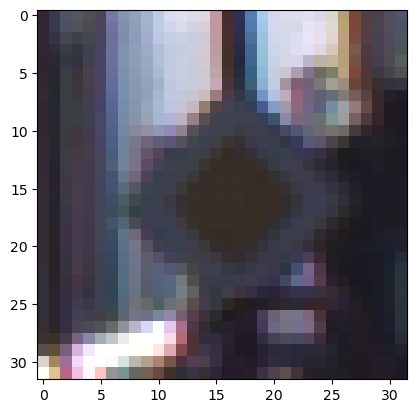

In [6]:
plot, prediction = test_on_img('C:/Users/hp/Documents/traffic sign recogination/Test/00010.png')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

In [6]:
# import tensorflow as tf
# path = './TSR.h5'
# model.save(path )
# loaded_model= tf.keras.models.load_model(path )

In [13]:
import cv2
frameWidth = 640
frameHeight = 480
brightness = 100
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

In [14]:
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)


True

In [9]:
## load tensorflow model
import keras
model = keras.models.load_model(save_path)

In [10]:
import numpy as np
# def grayscale(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     return img
# def equalize(img):
#     img =cv2.equalizeHist(img)
#     return img
# def preprocessing(img):
# #     img = grayscale(img)
# #     img = equalize(img)
#     img = img/255
#     return img

In [11]:
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
 

In [12]:
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()

    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 3)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
#     predictions = model.predict(img)
    predictions = (model.predict(img) > 0.5).astype("int32")
#     predictions = model.predict(img)
    predict_x=model.predict(img) 
    classIndex =np.argmax(predict_x,axis=1)
#     classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
    #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 54ms/step


KeyboardInterrupt: 